# Classification

Aksenyuk Sofya, 150284;
Górecki Piotr, 148282

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [2]:
data = [
[1, 0, 1, 1],
[0, 1, 0, 0],
[0, 1, 1, 1],
[1, 0, 1, 0],
[1, 0, 0, 1],
[0, 0, 1, 1],
[1, 1, 1, 1],
[1, 0, 0, 1],
[0, 1, 0, 1],
[0, 0, 0, 1],
]

1.2) Each object is assigned to a class "0" or "1". The assignements are as follows (cl):

In [3]:
cl = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

**1.3) When do you think an object is assigned to class "1"?** Answer: When the third(A3) and the fourth(A4) columns are equal to 1 (A3 = 1 and A4 = 1).

1.4) Build a naive Bayes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are propabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case when $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$. Do not forget to normalize the ''probabilities'' (divide by sum). <br>
(Advanced*) Add support for non-binary attribute values.

In [4]:
def getNaiveBayesProbabilities(obj, data, cl):
    p = [0.0, 0.0]
    # TODO     
    cl1 = np.sum(cl, axis=0) / len(cl)
    cl0 = 1 - cl1

    p0 = cl0
    p1 = cl1
    list_cl_0 = []
    list_cl_1 = []
    for i in range(len(cl)):
        if cl[i] == 0:
            list_cl_0.append(data[i])
        if cl[i] == 1:
            list_cl_1.append(data[i])

    p_j1_cl0 = []
    p_j0_cl0 = []

    p_j1_cl0 = np.sum(list_cl_0, axis=0) / len(list_cl_0)
    p_j0_cl0 = 1 - p_j1_cl0
    for m in range(len(p_j1_cl0)):
        if p_j1_cl0[m] == 0:
            p_j1_cl0 = 0.01
            p_j0_cl0 = 1 - p_j1_cl0[m]
        if p_j0_cl0[m] == 0:
            p_j0_cl0 = 0.01
            p_j1_cl0 = 1 - p_j0_cl0[m]

    p_j1_cl1 = []
    p_j0_cl1 = []

    p_j1_cl1 = np.sum(list_cl_1, axis=0) / len(list_cl_1)
    p_j0_cl1 = 1 - p_j1_cl1
    for k in range(len(p_j1_cl1)):
        if p_j1_cl1[k] == 0:
            p_j1_cl1[k] = 0.01
            p_j0_cl1[k] = 1 - p_j1_cl1[k]
        if p_j0_cl1[k] == 0:
            p_j0_cl1[k] = 0.01
            p_j1_cl1[k] = 1 - p_j0_cl1[k]


    for j in range(len(obj)):
        if obj[j] == 0:
            p0 *= p_j0_cl0[j]
            p1 *= p_j0_cl1[j]
        if obj[j] == 1:
            p0 *= p_j1_cl0[j]
            p1 *= p_j1_cl1[j]
            
        sum = p1 + p0
        p0 = p0 / sum
        p1 = p1 / sum
    p = [p0, p1]

    return p

1.6) Find objects which give a maximum probability for class "0" and "1". 

In [5]:
# TODO
probs = []
for i in data:    
    probs.append(getNaiveBayesProbabilities(i, data, cl))
probs = np.array(probs)
max_index = np.argmax(probs, axis=0)
max_prob = np.amax(probs, axis=0)
print("Matrix of probabilities: \n", probs)
print("The object which gives a maximum probability({}) in class 0:".format(max_prob[0]), data[max_index[0]])
print("The object which gives a maximum probability({}) in class 1:".format(max_prob[1]), data[max_index[1]])
# print(getNaiveBayesProbabilities([], data, cl))
# print(getNaiveBayesProbabilities([], data, cl))

Matrix of probabilities: 
 [[0.3125     0.6875    ]
 [0.97264438 0.02735562]
 [0.03257329 0.96742671]
 [0.96774194 0.03225806]
 [0.87912088 0.12087912]
 [0.16806723 0.83193277]
 [0.07042254 0.92957746]
 [0.87912088 0.12087912]
 [0.35010941 0.64989059]
 [0.76372315 0.23627685]]
The object which gives a maximum probability(0.9726443768996961) in class 0: [0, 1, 0, 0]
The object which gives a maximum probability(0.9674267100977199) in class 1: [0, 1, 1, 1]


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)): 

In [6]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- DATA: data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- CLASSIFIED : classified objects, [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- NOT_CLASSIFIED: list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent objects that are to be classified.

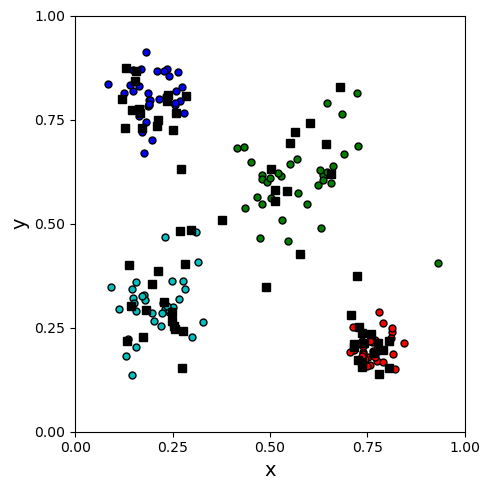

In [7]:
DATA = cm.getTestDataSet()
CLASSIFIED = cm.getTestClassified()
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN

2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  <br>
(Advanced*) Add support to "weighted" variant of k-NN

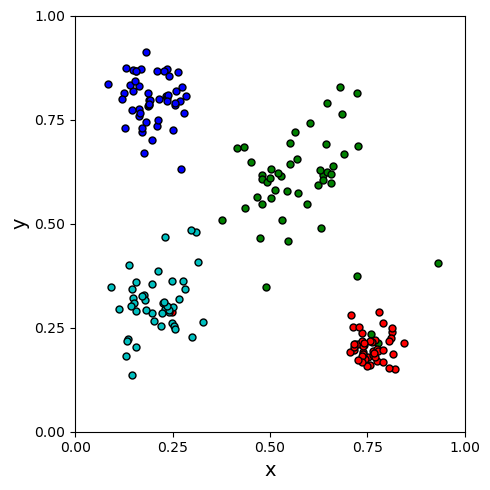

In [8]:
def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    ### COPY INPUT CLASSIFIED OBJECTS
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE THE CL, i.e., ADD RESPECTIVE INDICES 
    CL = CLASSIFIED.copy()
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    for IDX in range(len(NOT_CLASSIFIED)):
        OPER_LIST = []
        for Q in range(len(CL)):
            for G in range(len(CL[Q])):
                OPER_LIST.append(cm.getEuclideanDistance(DATA[NOT_CLASSIFIED[IDX]], DATA[CL[Q][G]]))
        INDEX_SMALL = OPER_LIST.index(min(OPER_LIST))
        for Q in range(len(CL)):
            if INDEX_SMALL in CL[Q]:
                CL[Q].append(NOT_CLASSIFIED[IDX])
    ################
    return CL
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. **Which class do you think is the most difficult/easiest to describe/characterize?** Answer: The blue one, because it is separated from other classes.

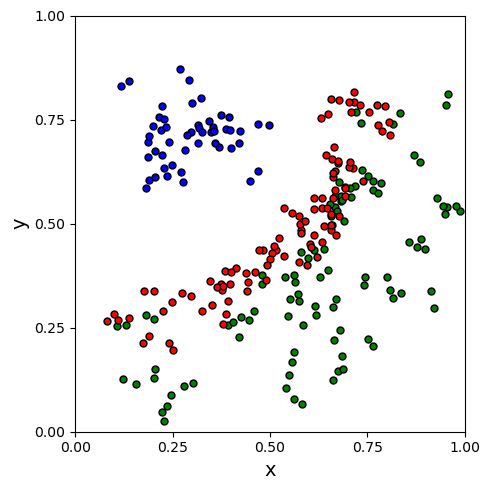

In [9]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [10]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignements for the first 75% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remianing "not classified" object indices. Run the code below and observe that 25% of some uniformly distributed data points are not classified. 

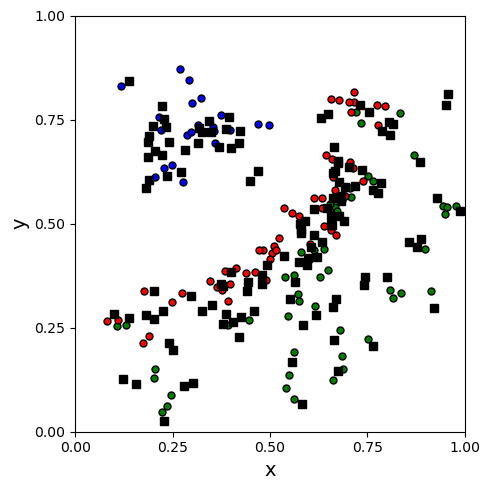

In [11]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for i in range(LIM):
    if idxs[i] < 50: CLASSIFIED_TRAIN[0].append(idxs[i])
    elif idxs[i] < 150: CLASSIFIED_TRAIN[1].append(idxs[i])
    else: CLASSIFIED_TRAIN[2].append(idxs[i])
for i in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[i])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

**Which class got the best/the worst recall. Why?**<br>
**What is the best K. Are there any significant differences?**<br>
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment. 

In [41]:
### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

for K in [1,3,5,7]:
    CL = doKNN(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)
    print(K)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]
    for i in range(len(CL)):
        for k in range(len(CL[i])):
            if CL[i][k] in CLASSIFIED_2:
                CORRECTLY[i] += 1
    for m in range(len(CORRECTLY)):
        INCORRECTLY.replace(1 - CORRECTLY[m])
    for j in range(len(CORRECTLY)):
        if CL[i] in CLASSIFIED_2:
            denom = len(CORRECTLY) + len(INCORRECTLY)
            if denom == 0:
                RECALL = 0
            else:
                RECALL = len(CORRECTLY) / denom
            
    #TODO 
    ### PRINT STATS
    print(CORRECTLY)
    print(INCORRECTLY)
    print(RECALL)
    ### DISPLAY
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)      

1


AttributeError: 'list' object has no attribute 'replace'